In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas_profiling 

In [3]:
df = pd.read_csv('./price_ratio_cagr_sector.csv')

Prepare for model


In [4]:
df.head(5)

,NAME,P_201101,P_201201,P_201301,P_201401,P_201501,P_201601,P_201701,P_201801,EPS_2012,...,CAGR_NPM,CAGR_IRD,CAGR_ROE,CAGR_ROA,CAGR_DPS,CAGR_BV,CAGR_Payout,sector,sector_code,business_group
0,FANCY,2.04,1.87,1.75,1.68,2.0,2.7,2.78,1.7,-0.15,...,6.267906,NaN,-5.872124,-1.052619,NaN,-5.405945,NaN,สินค้าอุปโภคบริโภค,1.0,ของใช้ในครัวเรือนและสำนักงาน
1,KYE,215.00,179.00,263.00,240.00,260.0,273.0,393.00,470.0,38.90,...,-1.434567,NaN,-11.896327,-9.105290,1.508768,8.092591,5.101882,สินค้าอุปโภคบริโภค,1.0,ของใช้ในครัวเรือนและสำนักงาน
2,MODERN,50.00,5.70,7.70,8.40,9.9,7.9,5.90,5.5,0.57,...,-11.877138,20.262051,-12.538095,-14.011722,-12.944944,-0.627984,-0.347231,สินค้าอุปโภคบริโภค,1.0,ของใช้ในครัวเรือนและสำนักงาน
3,SABINA,113.00,111.00,24.40,22.60,23.7,23.0,23.60,23.7,0.32,...,10.530804,-33.946925,9.544604,15.715264,48.123240,6.217560,26.658281,สินค้าอุปโภคบริโภค,1.0,แฟชั่น
4,SIAM,2.88,3.18,3.12,2.20,2.3,3.0,2.84,2.3,0.02,...,-262.712989,NaN,-242.192095,-238.517403,NaN,-2.514268,NaN,สินค้าอุปโภคบริโภค,1.0,ของใช้ในครัวเรือนและสำนักงาน


In [5]:
df.columns

Index(['NAME', 'P_201101', 'P_201201', 'P_201301', 'P_201401', 'P_201501',
       'P_201601', 'P_201701', 'P_201801', 'EPS_2012', 'EPS_2013', 'EPS_2014',
       'EPS_2015', 'EPS_2016', 'EPS_2017', 'GPM_2012', 'GPM_2013', 'GPM_2014',
       'GPM_2015', 'GPM_2016', 'GPM_2017', 'Ops_2012', 'Ops_2013', 'Ops_2014',
       'Ops_2015', 'Ops_2016', 'Ops_2017', 'EBIT_2012', 'EBIT_2013',
       'EBIT_2014', 'EBIT_2015', 'EBIT_2016', 'EBIT_2017', 'NPM_2012',
       'NPM_2013', 'NPM_2014', 'NPM_2015', 'NPM_2016', 'NPM_2017', 'IBD_2012',
       'IBD_2013', 'IBD_2014', 'IBD_2015', 'IBD_2016', 'IBD_2017', 'ROE_2012',
       'ROE_2013', 'ROE_2014', 'ROE_2015', 'ROE_2016', 'ROE_2017', 'ROA_2012',
       'ROA_2013', 'ROA_2014', 'ROA_2015', 'ROA_2016', 'ROA_2017', 'DPS_2012',
       'DPS_2013', 'DPS_2014', 'DPS_2015', 'DPS_2016', 'DPS_2017', 'BV_2012',
       'BV_2013', 'BV_2014', 'BV_2015', 'BV_2016', 'BV_2017', 'Payout_2012',
       'Payout_2013', 'Payout_2014', 'Payout_2015', 'Payout_2016',
       'Pa

# Select feature

In [6]:
sf2012 = ['P_201201', 
'EPS_2012',
'GPM_2012',
'Ops_2012',
'EBIT_2012',
'NPM_2012',
'IBD_2012',
'ROE_2012',
'ROA_2012',
'DPS_2012',
'BV_2012',
'Payout_2012']

In [7]:
sf2013 = ['P_201301', 
'EPS_2013',
'GPM_2013',
'Ops_2013',
'EBIT_2013',
'NPM_2013',
'IBD_2013',
'ROE_2013',
'ROA_2013',
'DPS_2013',
'BV_2013',
'Payout_2013']

In [8]:
sf2014 = ['P_201401', 
'EPS_2014',
'GPM_2014',
'Ops_2014',
'EBIT_2014',
'NPM_2014',
'IBD_2014',
'ROE_2014',
'ROA_2014',
'DPS_2014',
'BV_2014',
'Payout_2014']

In [9]:
sf2015 = ['P_201501', 
'EPS_2015',
'GPM_2015',
'Ops_2015',
'EBIT_2015',
'NPM_2015',
'IBD_2015',
'ROE_2015',
'ROA_2015',
'DPS_2015',
'BV_2015',
'Payout_2015']

In [10]:
sf2016 = ['P_201601', 
'EPS_2016',
'GPM_2016',
'Ops_2016',
'EBIT_2016',
'NPM_2016',
'IBD_2016',
'ROE_2016',
'ROA_2016',
'DPS_2016',
'BV_2016',
'Payout_2016']

In [11]:
sf2017 = ['P_201701', 
'EPS_2017',
'GPM_2017',
'Ops_2017',
'EBIT_2017',
'NPM_2017',
'IBD_2017',
'ROE_2017',
'ROA_2017',
'DPS_2017',
'BV_2017',
'Payout_2017']

# Feature correlation

In [12]:
df[sf2012]

,P_201201,EPS_2012,GPM_2012,Ops_2012,EBIT_2012,NPM_2012,IBD_2012,ROE_2012,ROA_2012,DPS_2012,BV_2012,Payout_2012
0,1.87,-0.15,16.18,10.85,0.00,-17.88,NaN,-5.30,-5.22,NaN,2.68,NaN
1,179.00,38.90,16.43,12.24,0.00,8.96,NaN,21.32,14.11,19.55,196.38,50.26
2,5.70,0.57,40.62,28.38,0.01,13.53,0.03,16.96,12.15,0.50,3.49,87.72
3,111.00,0.32,49.74,NaN,0.12,5.54,0.45,8.45,5.07,0.12,4.03,35.94
4,3.18,0.02,17.14,16.64,-0.03,0.26,NaN,0.36,0.26,NaN,4.31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
286,17.60,2.26,10.74,3.03,0.01,6.61,0.02,29.00,16.16,1.80,8.43,79.65
287,7.20,1.01,28.75,11.18,NaN,21.34,NaN,31.05,27.46,0.50,3.22,49.50
288,5.25,0.14,9.37,3.70,0.03,4.80,NaN,7.41,5.90,0.02,1.99,16.69
289,83.75,1.05,19.07,3.52,NaN,15.47,NaN,34.07,30.04,0.07,3.28,6.67


In [13]:
df[sf2012].corr()

,P_201201,EPS_2012,GPM_2012,Ops_2012,EBIT_2012,NPM_2012,IBD_2012,ROE_2012,ROA_2012,DPS_2012,BV_2012,Payout_2012
P_201201,1.000000,0.563938,0.069985,-0.102210,-0.013543,-0.003848,-0.026985,0.119095,0.109181,0.576435,0.578729,0.018071
EPS_2012,0.563938,1.000000,0.073532,-0.057838,-0.018203,0.033257,-0.075496,0.175302,0.160611,0.869124,0.874431,-0.008437
GPM_2012,0.069985,0.073532,1.000000,0.505038,0.020379,0.273754,-0.091829,0.254930,0.301000,0.052419,0.004543,0.043617
Ops_2012,-0.102210,-0.057838,0.505038,1.000000,0.033519,0.133756,-0.041585,0.037570,-0.050143,-0.070753,-0.063586,-0.013627
EBIT_2012,-0.013543,-0.018203,0.020379,0.033519,1.000000,0.001710,0.092720,0.015606,-0.005032,-0.066567,-0.014634,0.142240
NPM_2012,-0.003848,0.033257,0.273754,0.133756,0.001710,1.000000,-0.113351,0.197830,0.213889,0.089429,0.007011,-0.017353
IBD_2012,-0.026985,-0.075496,-0.091829,-0.041585,0.092720,-0.113351,1.000000,-0.127444,-0.252221,-0.067948,-0.043949,0.197161
ROE_2012,0.119095,0.175302,0.254930,0.037570,0.015606,0.197830,-0.127444,1.000000,0.804456,0.224102,0.037202,0.007889
ROA_2012,0.109181,0.160611,0.301000,-0.050143,-0.005032,0.213889,-0.252221,0.804456,1.000000,0.161807,0.027403,0.012471
DPS_2012,0.576435,0.869124,0.052419,-0.070753,-0.066567,0.089429,-0.067948,0.224102,0.161807,1.000000,0.784957,0.061923


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


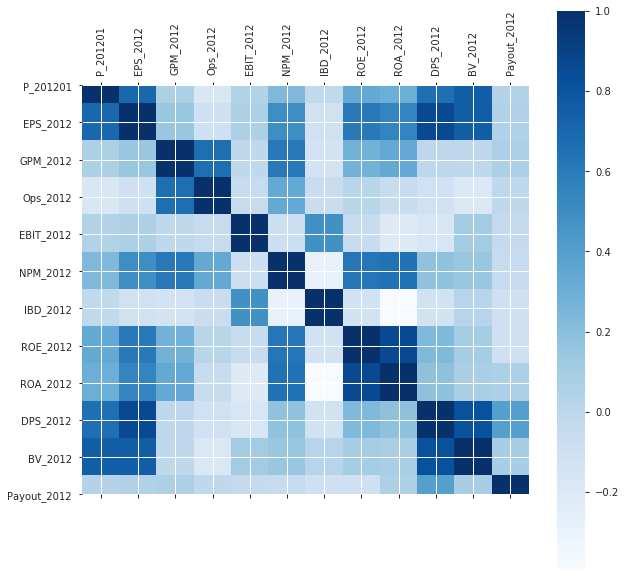

In [14]:
plt.figure(figsize=(10,10))
plt.matshow(df[sf2012].corr('spearman'),fignum=1,cmap='Blues')
plt.xticks(np.arange(12),df[sf2012].corr().columns,rotation=90)
plt.yticks(np.arange(12),df[sf2012].corr().columns,rotation=0)
plt.colorbar()

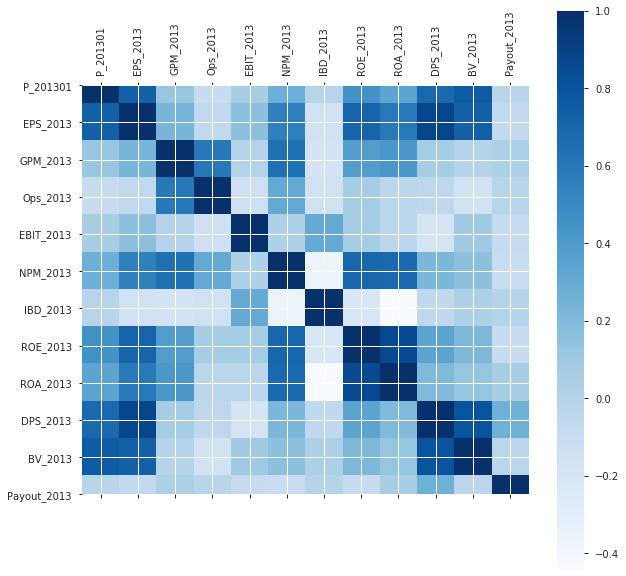

In [15]:
plt.figure(figsize=(10,10))
plt.matshow(df[sf2013].corr('spearman'),fignum=1,cmap='Blues')
plt.xticks(np.arange(12),df[sf2013].corr().columns,rotation=90)
plt.yticks(np.arange(12),df[sf2013].corr().columns,rotation=0)
plt.colorbar()

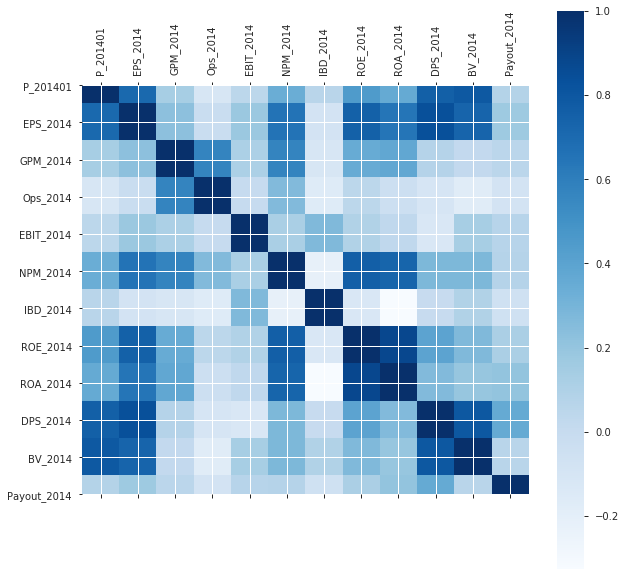

In [16]:
plt.figure(figsize=(10,10))
plt.matshow(df[sf2014].corr('spearman'),fignum=1,cmap='Blues')
plt.xticks(np.arange(12),df[sf2014].corr().columns,rotation=90)
plt.yticks(np.arange(12),df[sf2014].corr().columns,rotation=0)
plt.colorbar()

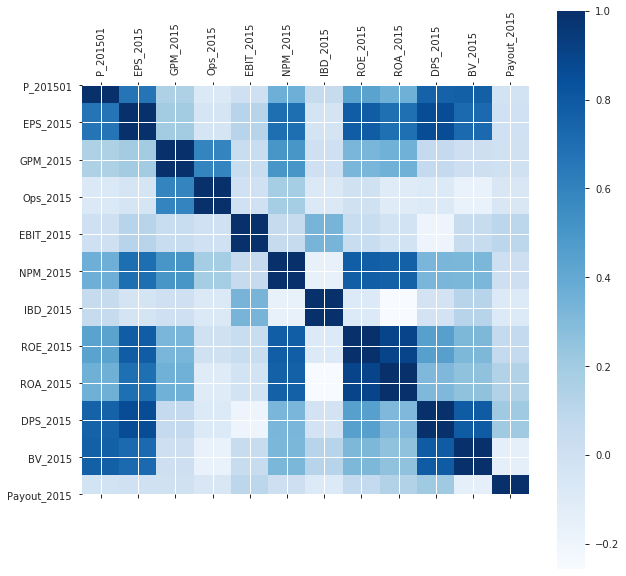

In [17]:
plt.figure(figsize=(10,10))
plt.matshow(df[sf2015].corr('spearman'),fignum=1,cmap='Blues')
plt.xticks(np.arange(12),df[sf2015].corr().columns,rotation=90)
plt.yticks(np.arange(12),df[sf2015].corr().columns,rotation=0)
plt.colorbar()

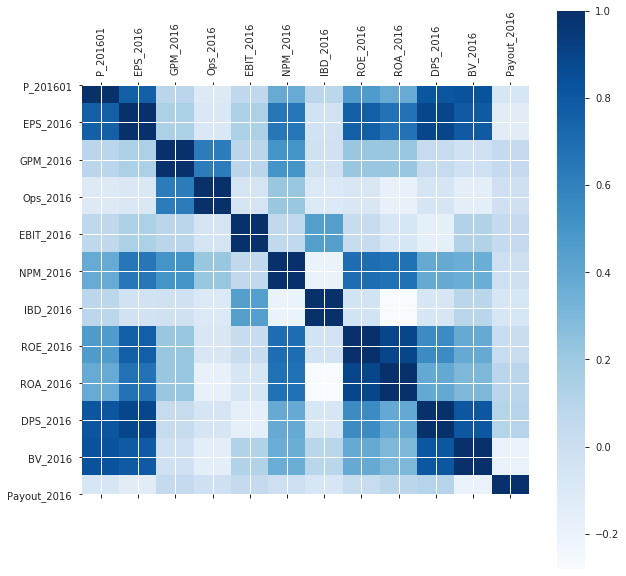

In [18]:
plt.figure(figsize=(10,10))
plt.matshow(df[sf2016].corr('spearman'),fignum=1,cmap='Blues')
plt.xticks(np.arange(12),df[sf2016].corr().columns,rotation=90)
plt.yticks(np.arange(12),df[sf2016].corr().columns,rotation=0)
plt.colorbar()

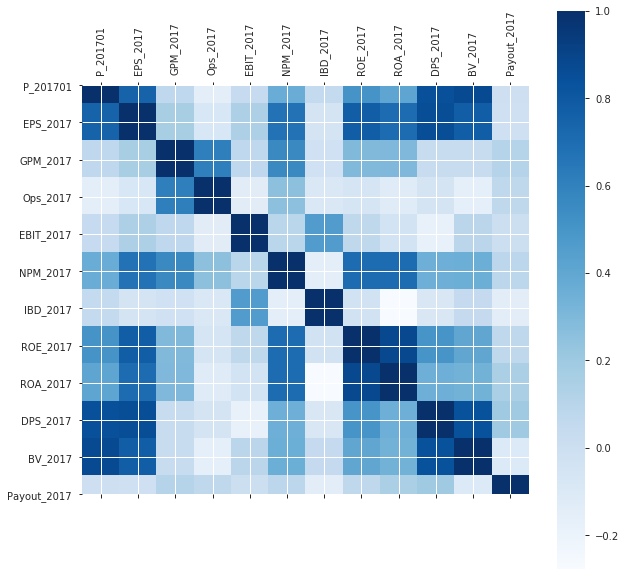

In [19]:
plt.figure(figsize=(10,10))
plt.matshow(df[sf2017].corr('spearman'),fignum=1,cmap='Blues')
plt.xticks(np.arange(12),df[sf2017].corr().columns,rotation=90)
plt.yticks(np.arange(12),df[sf2017].corr().columns,rotation=0)
plt.colorbar()

# Price correlation

In [20]:
corr2012 = df[sf2012].corr()['P_201201'].rename({
    'P_201201' : 'P', 
    'EPS_2012' : 'EPS', 
    'GPM_2012' : 'GPM', 
    'Ops_2012' : 'Ops', 
    'EBIT_2012' : 'EBIT', 
    'NPM_2012' : 'NPM', 
    'IBD_2012' : 'IBD', 
    'ROE_2012' : 'ROE', 
    'ROA_2012' : 'ROA', 
    'DPS_2012' : 'DPS', 
    'BV_2012' : 'BV', 
    'Payout_2012' : 'Payout'
}) #.sort_values(ascending=False)

In [21]:
corr2013 = df[sf2013].corr()['P_201301'].rename({
    'P_201301' : 'P', 
    'EPS_2013' : 'EPS', 
    'GPM_2013' : 'GPM', 
    'Ops_2013' : 'Ops', 
    'EBIT_2013' : 'EBIT', 
    'NPM_2013' : 'NPM', 
    'IBD_2013' : 'IBD', 
    'ROE_2013' : 'ROE', 
    'ROA_2013' : 'ROA', 
    'DPS_2013' : 'DPS', 
    'BV_2013' : 'BV', 
    'Payout_2013' : 'Payout'
})

In [22]:
corr2014 = df[sf2014].corr()['P_201401'].rename({
    'P_201401' : 'P', 
    'EPS_2014' : 'EPS', 
    'GPM_2014' : 'GPM', 
    'Ops_2014' : 'Ops', 
    'EBIT_2014' : 'EBIT', 
    'NPM_2014' : 'NPM', 
    'IBD_2014' : 'IBD', 
    'ROE_2014' : 'ROE', 
    'ROA_2014' : 'ROA', 
    'DPS_2014' : 'DPS', 
    'BV_2014' : 'BV', 
    'Payout_2014' : 'Payout'
})

In [23]:
corr2015 = df[sf2015].corr()['P_201501'].rename({
    'P_201501' : 'P', 
    'EPS_2015' : 'EPS', 
    'GPM_2015' : 'GPM', 
    'Ops_2015' : 'Ops', 
    'EBIT_2015' : 'EBIT', 
    'NPM_2015' : 'NPM', 
    'IBD_2015' : 'IBD', 
    'ROE_2015' : 'ROE', 
    'ROA_2015' : 'ROA', 
    'DPS_2015' : 'DPS', 
    'BV_2015' : 'BV', 
    'Payout_2015' : 'Payout'
})

In [24]:
corr2016 = df[sf2016].corr()['P_201601'].rename({
    'P_201601' : 'P', 
    'EPS_2016' : 'EPS', 
    'GPM_2016' : 'GPM', 
    'Ops_2016' : 'Ops', 
    'EBIT_2016' : 'EBIT', 
    'NPM_2016' : 'NPM', 
    'IBD_2016' : 'IBD', 
    'ROE_2016' : 'ROE', 
    'ROA_2016' : 'ROA', 
    'DPS_2016' : 'DPS', 
    'BV_2016' : 'BV', 
    'Payout_2016' : 'Payout'
})

In [25]:
corr2017 = df[sf2017].corr()['P_201701'].rename({
    'P_201701' : 'P', 
    'EPS_2017' : 'EPS', 
    'GPM_2017' : 'GPM', 
    'Ops_2017' : 'Ops', 
    'EBIT_2017' : 'EBIT', 
    'NPM_2017' : 'NPM', 
    'IBD_2017' : 'IBD', 
    'ROE_2017' : 'ROE', 
    'ROA_2017' : 'ROA', 
    'DPS_2017' : 'DPS', 
    'BV_2017' : 'BV', 
    'Payout_2017' : 'Payout'
})

In [26]:
corr_mat = pd.DataFrame({
    'corr2012': corr2012,
    'corr2013': corr2013,
    'corr2014': corr2014,
    'corr2015': corr2015,
    'corr2016': corr2016,
    'corr2017': corr2017
})

In [27]:
corr_mat_sort = corr_mat.sort_values(by='corr2012', ascending=False)
corr_mat_sort

,corr2012,corr2013,corr2014,corr2015,corr2016,corr2017
P,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
BV,0.578729,0.663245,0.795801,0.769508,0.772482,0.777747
DPS,0.576435,0.742352,0.829126,0.839421,0.814103,0.823045
EPS,0.563938,0.731008,0.808789,0.810396,0.784989,0.816188
ROE,0.119095,0.173135,0.204822,0.197250,0.178288,0.174591
ROA,0.109181,0.149564,0.181804,0.160212,0.161732,0.150948
GPM,0.069985,0.059269,0.086218,0.085111,0.051078,0.030134
Payout,0.018071,0.030429,-0.001076,-0.024985,0.008502,0.018074
NPM,-0.003848,0.039940,0.121712,0.052705,0.036564,0.013959
EBIT,-0.013543,0.019969,0.021032,0.003198,0.019040,0.018176


In [28]:
corr_mat_sort.T

,P,BV,DPS,EPS,ROE,ROA,GPM,Payout,NPM,EBIT,IBD,Ops
corr2012,1.0,0.578729,0.576435,0.563938,0.119095,0.109181,0.069985,0.018071,-0.003848,-0.013543,-0.026985,-0.102210
corr2013,1.0,0.663245,0.742352,0.731008,0.173135,0.149564,0.059269,0.030429,0.039940,0.019969,-0.025422,-0.052159
corr2014,1.0,0.795801,0.829126,0.808789,0.204822,0.181804,0.086218,-0.001076,0.121712,0.021032,-0.027075,-0.032806
corr2015,1.0,0.769508,0.839421,0.810396,0.197250,0.160212,0.085111,-0.024985,0.052705,0.003198,-0.014046,-0.029146
corr2016,1.0,0.772482,0.814103,0.784989,0.178288,0.161732,0.051078,0.008502,0.036564,0.019040,-0.004112,-0.036502
corr2017,1.0,0.777747,0.823045,0.816188,0.174591,0.150948,0.030134,0.018074,0.013959,0.018176,-0.034385,-0.034716


In [29]:
# plt.rcParams["axes.grid"] = True

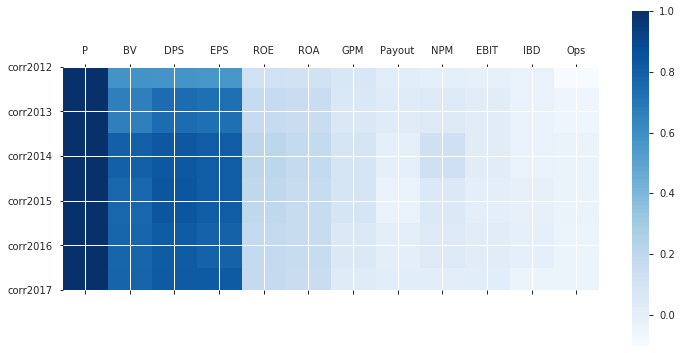

In [30]:
plt.figure(figsize=(12,6))
plt.matshow(corr_mat_sort.T,fignum=1,cmap='Blues')
plt.xticks(np.arange(12), corr_mat_sort.T.columns,rotation=0)
plt.yticks(np.arange(6), corr_mat_sort.T.index,rotation=0)
plt.colorbar()

# Diff

## make diff column

In [31]:
diff_df = pd.DataFrame({
    'P_2013': df['P_201301'],
    'P_2014': df['P_201401'],
    'P_2015': df['P_201501'],
    'P_2016': df['P_201601'],
    'P_2017': df['P_201701'],

    'P_D_2013_2012':  df['P_201301'] - df['P_201201'], 
    'P_D_2014_2013':  df['P_201401'] - df['P_201301'], 
    'P_D_2015_2014':  df['P_201501'] - df['P_201401'], 
    'P_D_2016_2015':  df['P_201601'] - df['P_201501'], 
    'P_D_2017_2016':  df['P_201701'] - df['P_201601'], 
    
    'EPS_D_2013_2012':  df['EPS_2013'] - df['EPS_2012'], 
    'EPS_D_2014_2013':  df['EPS_2014'] - df['EPS_2013'], 
    'EPS_D_2015_2014':  df['EPS_2015'] - df['EPS_2014'], 
    'EPS_D_2016_2015':  df['EPS_2016'] - df['EPS_2015'], 
    'EPS_D_2017_2016':  df['EPS_2017'] - df['EPS_2016'], 
    
    'GPM_D_2013_2012':  df['GPM_2013'] - df['GPM_2012'], 
    'GPM_D_2014_2013':  df['GPM_2014'] - df['GPM_2013'], 
    'GPM_D_2015_2014':  df['GPM_2015'] - df['GPM_2014'], 
    'GPM_D_2016_2015':  df['GPM_2016'] - df['GPM_2015'], 
    'GPM_D_2017_2016':  df['GPM_2017'] - df['GPM_2016'], 
    
    'Ops_D_2013_2012':  df['Ops_2013'] - df['Ops_2012'], 
    'Ops_D_2014_2013':  df['Ops_2014'] - df['Ops_2013'], 
    'Ops_D_2015_2014':  df['Ops_2015'] - df['Ops_2014'], 
    'Ops_D_2016_2015':  df['Ops_2016'] - df['Ops_2015'], 
    'Ops_D_2017_2016':  df['Ops_2017'] - df['Ops_2016'], 
    
    'EBIT_D_2013_2012':  df['EBIT_2013'] - df['EBIT_2012'], 
    'EBIT_D_2014_2013':  df['EBIT_2014'] - df['EBIT_2013'], 
    'EBIT_D_2015_2014':  df['EBIT_2015'] - df['EBIT_2014'], 
    'EBIT_D_2016_2015':  df['EBIT_2016'] - df['EBIT_2015'], 
    'EBIT_D_2017_2016':  df['EBIT_2017'] - df['EBIT_2016'], 
    
    'NPM_D_2013_2012':  df['NPM_2013'] - df['NPM_2012'], 
    'NPM_D_2014_2013':  df['NPM_2014'] - df['NPM_2013'], 
    'NPM_D_2015_2014':  df['NPM_2015'] - df['NPM_2014'], 
    'NPM_D_2016_2015':  df['NPM_2016'] - df['NPM_2015'], 
    'NPM_D_2017_2016':  df['NPM_2017'] - df['NPM_2016'], 
    
    'IBD_D_2013_2012':  df['IBD_2013'] - df['IBD_2012'], 
    'IBD_D_2014_2013':  df['IBD_2014'] - df['IBD_2013'], 
    'IBD_D_2015_2014':  df['IBD_2015'] - df['IBD_2014'], 
    'IBD_D_2016_2015':  df['IBD_2016'] - df['IBD_2015'], 
    'IBD_D_2017_2016':  df['IBD_2017'] - df['IBD_2016'], 
    
    'ROE_D_2013_2012':  df['ROE_2013'] - df['ROE_2012'], 
    'ROE_D_2014_2013':  df['ROE_2014'] - df['ROE_2013'], 
    'ROE_D_2015_2014':  df['ROE_2015'] - df['ROE_2014'], 
    'ROE_D_2016_2015':  df['ROE_2016'] - df['ROE_2015'], 
    'ROE_D_2017_2016':  df['ROE_2017'] - df['ROE_2016'], 
    
    'ROA_D_2013_2012':  df['ROA_2013'] - df['ROA_2012'], 
    'ROA_D_2014_2013':  df['ROA_2014'] - df['ROA_2013'], 
    'ROA_D_2015_2014':  df['ROA_2015'] - df['ROA_2014'], 
    'ROA_D_2016_2015':  df['ROA_2016'] - df['ROA_2015'], 
    'ROA_D_2017_2016':  df['ROA_2017'] - df['ROA_2016'], 
    
    'DPS_D_2013_2012':  df['DPS_2013'] - df['DPS_2012'], 
    'DPS_D_2014_2013':  df['DPS_2014'] - df['DPS_2013'], 
    'DPS_D_2015_2014':  df['DPS_2015'] - df['DPS_2014'], 
    'DPS_D_2016_2015':  df['DPS_2016'] - df['DPS_2015'], 
    'DPS_D_2017_2016':  df['DPS_2017'] - df['DPS_2016'], 
    
    'BV_D_2013_2012':  df['BV_2013'] - df['BV_2012'], 
    'BV_D_2014_2013':  df['BV_2014'] - df['BV_2013'], 
    'BV_D_2015_2014':  df['BV_2015'] - df['BV_2014'], 
    'BV_D_2016_2015':  df['BV_2016'] - df['BV_2015'], 
    'BV_D_2017_2016':  df['BV_2017'] - df['BV_2016'], 
    
    'Payout_D_2013_2012':  df['Payout_2013'] - df['Payout_2012'], 
    'Payout_D_2014_2013':  df['Payout_2014'] - df['Payout_2013'], 
    'Payout_D_2015_2014':  df['Payout_2015'] - df['Payout_2014'], 
    'Payout_D_2016_2015':  df['Payout_2016'] - df['Payout_2015'], 
    'Payout_D_2017_2016':  df['Payout_2017'] - df['Payout_2016']
})

In [32]:
diff_df

,P_2013,P_2014,P_2015,P_2016,P_2017,P_D_2013_2012,P_D_2014_2013,P_D_2015_2014,P_D_2016_2015,P_D_2017_2016,...,BV_D_2013_2012,BV_D_2014_2013,BV_D_2015_2014,BV_D_2016_2015,BV_D_2017_2016,Payout_D_2013_2012,Payout_D_2014_2013,Payout_D_2015_2014,Payout_D_2016_2015,Payout_D_2017_2016
0,1.75,1.68,2.00,2.70,2.78,-0.12,-0.07,0.32,0.70,0.08,...,0.06,-0.06,-0.17,-0.32,-0.16,NaN,-41.67,NaN,NaN,NaN
1,263.00,240.00,260.00,273.00,393.00,84.00,-23.00,20.00,13.00,120.00,...,2.92,30.07,17.03,41.45,1.94,-0.26,0.01,5.05,-20.36,29.75
2,7.70,8.40,9.90,7.90,5.90,2.00,0.70,1.50,-2.00,-2.00,...,0.23,-0.14,-0.19,-0.15,0.14,8.77,-44.11,4.44,51.88,-22.49
3,24.40,22.60,23.70,23.00,23.60,-86.60,-1.80,1.10,-0.70,0.60,...,0.21,0.27,0.28,0.26,0.40,2.30,2.24,-0.90,7.48,70.08
4,3.12,2.20,2.30,3.00,2.84,-0.06,-0.92,0.10,0.70,-0.16,...,-0.37,-0.10,0.00,0.02,-0.07,NaN,NaN,NaN,NaN,7.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,24.30,18.50,21.20,22.50,40.25,6.70,-5.80,2.70,1.30,17.75,...,-0.11,0.51,0.49,1.24,-0.43,-54.44,58.92,-3.28,-44.19,-1.29
287,11.30,9.80,9.95,4.56,7.15,4.10,-1.50,0.15,-5.39,2.59,...,0.18,0.07,-0.19,0.27,-0.25,9.32,-7.10,-301.72,318.18,-234.85
288,8.35,2.48,4.24,3.30,6.30,3.10,-5.87,1.76,-0.94,3.00,...,0.73,0.12,0.16,0.14,0.34,43.92,-1.79,1.18,-8.28,-21.11
289,95.25,10.20,10.60,7.80,7.75,11.50,-85.05,0.40,-2.80,-0.05,...,0.08,0.13,-0.07,0.01,0.26,18.97,47.89,26.47,-37.84,-27.31


## feature selection

In [33]:
sf_d_2013_2012 = [
    'P_D_2013_2012',
    'EPS_D_2013_2012',
    'GPM_D_2013_2012',
    'Ops_D_2013_2012',
    'EBIT_D_2013_2012',
    'NPM_D_2013_2012',
    'IBD_D_2013_2012',
    'ROE_D_2013_2012',
    'ROA_D_2013_2012',
    'DPS_D_2013_2012',
    'BV_D_2013_2012',
    'Payout_D_2013_2012'
]

In [34]:
sf_d_2014_2013 = [
    'P_D_2014_2013',
    'EPS_D_2014_2013',
    'GPM_D_2014_2013',
    'Ops_D_2014_2013',
    'EBIT_D_2014_2013',
    'NPM_D_2014_2013',
    'IBD_D_2014_2013',
    'ROE_D_2014_2013',
    'ROA_D_2014_2013',
    'DPS_D_2014_2013',
    'BV_D_2014_2013',
    'Payout_D_2014_2013'
]

In [35]:
sf_d_2015_2014 = [
    'P_D_2015_2014',
    'EPS_D_2015_2014',
    'GPM_D_2015_2014',
    'Ops_D_2015_2014',
    'EBIT_D_2015_2014',
    'NPM_D_2015_2014',
    'IBD_D_2015_2014',
    'ROE_D_2015_2014',
    'ROA_D_2015_2014',
    'DPS_D_2015_2014',
    'BV_D_2015_2014',
    'Payout_D_2015_2014'
]

In [36]:
sf_d_2016_2015 = [
    'P_D_2016_2015',
    'EPS_D_2016_2015',
    'GPM_D_2016_2015',
    'Ops_D_2016_2015',
    'EBIT_D_2016_2015',
    'NPM_D_2016_2015',
    'IBD_D_2016_2015',
    'ROE_D_2016_2015',
    'ROA_D_2016_2015',
    'DPS_D_2016_2015',
    'BV_D_2016_2015',
    'Payout_D_2016_2015'
]

In [37]:
sf_d_2017_2016 = [
    'P_D_2017_2016',
    'EPS_D_2017_2016',
    'GPM_D_2017_2016',
    'Ops_D_2017_2016',
    'EBIT_D_2017_2016',
    'NPM_D_2017_2016',
    'IBD_D_2017_2016',
    'ROE_D_2017_2016',
    'ROA_D_2017_2016',
    'DPS_D_2017_2016',
    'BV_D_2017_2016',
    'Payout_D_2017_2016'
]

## diff corr

In [38]:
corr_d_2013_2012 = diff_df[sf_d_2013_2012].corr()['P_D_2013_2012'].rename({
    'P_D_2013_2012' : 'P_D', 
    'EPS_D_2013_2012' : 'EPS_D', 
    'GPM_D_2013_2012' : 'GPM_D', 
    'Ops_D_2013_2012' : 'Ops_D', 
    'EBIT_D_2013_2012' : 'EBIT_D', 
    'NPM_D_2013_2012' : 'NPM_D', 
    'IBD_D_2013_2012' : 'IBD_D', 
    'ROE_D_2013_2012' : 'ROE_D', 
    'ROA_D_2013_2012' : 'ROA_D', 
    'DPS_D_2013_2012' : 'DPS_D', 
    'BV_D_2013_2012' : 'BV_D', 
    'Payout_D_2013_2012' : 'Payout_D'
})

In [39]:
corr_d_2014_2013 = diff_df[sf_d_2014_2013].corr()['P_D_2014_2013'].rename({
    'P_D_2014_2013' : 'P_D', 
    'EPS_D_2014_2013' : 'EPS_D', 
    'GPM_D_2014_2013' : 'GPM_D', 
    'Ops_D_2014_2013' : 'Ops_D', 
    'EBIT_D_2014_2013' : 'EBIT_D', 
    'NPM_D_2014_2013' : 'NPM_D', 
    'IBD_D_2014_2013' : 'IBD_D', 
    'ROE_D_2014_2013' : 'ROE_D', 
    'ROA_D_2014_2013' : 'ROA_D', 
    'DPS_D_2014_2013' : 'DPS_D', 
    'BV_D_2014_2013' : 'BV_D', 
    'Payout_D_2014_2013' : 'Payout_D'
})

In [40]:
corr_d_2015_2014 = diff_df[sf_d_2015_2014].corr()['P_D_2015_2014'].rename({
    'P_D_2015_2014' : 'P_D', 
    'EPS_D_2015_2014' : 'EPS_D', 
    'GPM_D_2015_2014' : 'GPM_D', 
    'Ops_D_2015_2014' : 'Ops_D', 
    'EBIT_D_2015_2014' : 'EBIT_D', 
    'NPM_D_2015_2014' : 'NPM_D', 
    'IBD_D_2015_2014' : 'IBD_D', 
    'ROE_D_2015_2014' : 'ROE_D', 
    'ROA_D_2015_2014' : 'ROA_D', 
    'DPS_D_2015_2014' : 'DPS_D', 
    'BV_D_2015_2014' : 'BV_D', 
    'Payout_D_2015_2014' : 'Payout_D'
})

In [41]:
corr_d_2016_2015 = diff_df[sf_d_2016_2015].corr()['P_D_2016_2015'].rename({
    'P_D_2016_2015' : 'P_D', 
    'EPS_D_2016_2015' : 'EPS_D', 
    'GPM_D_2016_2015' : 'GPM_D', 
    'Ops_D_2016_2015' : 'Ops_D', 
    'EBIT_D_2016_2015' : 'EBIT_D', 
    'NPM_D_2016_2015' : 'NPM_D', 
    'IBD_D_2016_2015' : 'IBD_D', 
    'ROE_D_2016_2015' : 'ROE_D', 
    'ROA_D_2016_2015' : 'ROA_D', 
    'DPS_D_2016_2015' : 'DPS_D', 
    'BV_D_2016_2015' : 'BV_D', 
    'Payout_D_2016_2015' : 'Payout_D'
})

In [42]:
corr_d_2017_2016 = diff_df[sf_d_2017_2016].corr()['P_D_2017_2016'].rename({
    'P_D_2017_2016' : 'P_D', 
    'EPS_D_2017_2016' : 'EPS_D', 
    'GPM_D_2017_2016' : 'GPM_D', 
    'Ops_D_2017_2016' : 'Ops_D', 
    'EBIT_D_2017_2016' : 'EBIT_D', 
    'NPM_D_2017_2016' : 'NPM_D', 
    'IBD_D_2017_2016' : 'IBD_D', 
    'ROE_D_2017_2016' : 'ROE_D', 
    'ROA_D_2017_2016' : 'ROA_D', 
    'DPS_D_2017_2016' : 'DPS_D', 
    'BV_D_2017_2016' : 'BV_D', 
    'Payout_D_2017_2016' : 'Payout_D'
})

In [43]:
corr_d_mat = pd.DataFrame({
    'corr_d_2013_2012': corr_d_2013_2012,
    'corr_d_2014_2013': corr_d_2014_2013,
    'corr_d_2015_2014': corr_d_2015_2014,
    'corr_d_2016_2015': corr_d_2016_2015,
    'corr_d_2017_2016': corr_d_2017_2016
})

In [44]:
corr_d_mat_sort = corr_d_mat.sort_values(by='corr_d_2015_2014', ascending=False)
corr_d_mat_sort

,corr_d_2013_2012,corr_d_2014_2013,corr_d_2015_2014,corr_d_2016_2015,corr_d_2017_2016
P_D,1.000000,1.000000,1.000000,1.000000,1.000000
DPS_D,0.011287,0.049399,0.285828,0.269028,0.268567
BV_D,0.501151,0.025453,0.215925,-0.040319,0.167284
EPS_D,0.199250,0.011876,0.096793,0.084282,-0.263004
GPM_D,0.059069,-0.001343,0.062136,0.088238,0.004017
Payout_D,-0.008055,0.016045,0.044653,-0.020422,0.002062
Ops_D,0.062342,0.012979,0.017703,0.043921,0.022122
EBIT_D,0.000281,-0.000649,0.006970,0.004688,-0.007717
ROA_D,0.016251,0.001509,0.006662,0.089976,-0.033098
NPM_D,0.015497,-0.027345,0.005839,-0.017572,-0.019783


In [45]:
corr_d_mat_sort.T

,P_D,DPS_D,BV_D,EPS_D,GPM_D,Payout_D,Ops_D,EBIT_D,ROA_D,NPM_D,IBD_D,ROE_D
corr_d_2013_2012,1.0,0.011287,0.501151,0.199250,0.059069,-0.008055,0.062342,0.000281,0.016251,0.015497,-0.002659,0.037903
corr_d_2014_2013,1.0,0.049399,0.025453,0.011876,-0.001343,0.016045,0.012979,-0.000649,0.001509,-0.027345,0.008940,-0.002935
corr_d_2015_2014,1.0,0.285828,0.215925,0.096793,0.062136,0.044653,0.017703,0.006970,0.006662,0.005839,0.003839,-0.006082
corr_d_2016_2015,1.0,0.269028,-0.040319,0.084282,0.088238,-0.020422,0.043921,0.004688,0.089976,-0.017572,-0.110394,0.057021
corr_d_2017_2016,1.0,0.268567,0.167284,-0.263004,0.004017,0.002062,0.022122,-0.007717,-0.033098,-0.019783,-0.034077,-0.014440


## diff ratio vs diff price

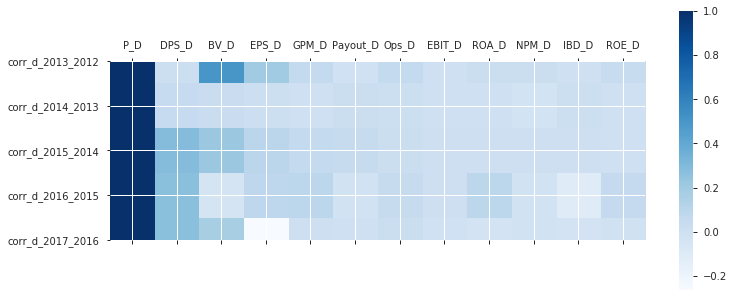

In [46]:
plt.figure(figsize=(12,5))
plt.matshow(corr_d_mat_sort.T,fignum=1,cmap='Blues')
plt.xticks(np.arange(12), corr_d_mat_sort.T.columns,rotation=0)
plt.yticks(np.arange(5), corr_d_mat_sort.T.index,rotation=0)
plt.colorbar()

In [47]:
sf_dnp_2013_2012 = [
    'P_2013',
    'EPS_D_2013_2012',
    'GPM_D_2013_2012',
    'Ops_D_2013_2012',
    'EBIT_D_2013_2012',
    'NPM_D_2013_2012',
    'IBD_D_2013_2012',
    'ROE_D_2013_2012',
    'ROA_D_2013_2012',
    'DPS_D_2013_2012',
    'BV_D_2013_2012',
    'Payout_D_2013_2012'
]

In [48]:
sf_dnp_2014_2013 = [
    'P_2014',
    'EPS_D_2014_2013',
    'GPM_D_2014_2013',
    'Ops_D_2014_2013',
    'EBIT_D_2014_2013',
    'NPM_D_2014_2013',
    'IBD_D_2014_2013',
    'ROE_D_2014_2013',
    'ROA_D_2014_2013',
    'DPS_D_2014_2013',
    'BV_D_2014_2013',
    'Payout_D_2014_2013'
]

In [49]:
sf_dnp_2015_2014 = [
    'P_2015',
    'EPS_D_2015_2014',
    'GPM_D_2015_2014',
    'Ops_D_2015_2014',
    'EBIT_D_2015_2014',
    'NPM_D_2015_2014',
    'IBD_D_2015_2014',
    'ROE_D_2015_2014',
    'ROA_D_2015_2014',
    'DPS_D_2015_2014',
    'BV_D_2015_2014',
    'Payout_D_2015_2014'
]

In [50]:
sf_dnp_2016_2015 = [
    'P_2016',
    'EPS_D_2016_2015',
    'GPM_D_2016_2015',
    'Ops_D_2016_2015',
    'EBIT_D_2016_2015',
    'NPM_D_2016_2015',
    'IBD_D_2016_2015',
    'ROE_D_2016_2015',
    'ROA_D_2016_2015',
    'DPS_D_2016_2015',
    'BV_D_2016_2015',
    'Payout_D_2016_2015'
]

In [51]:
sf_dnp_2017_2016 = [
    'P_2017',
    'EPS_D_2017_2016',
    'GPM_D_2017_2016',
    'Ops_D_2017_2016',
    'EBIT_D_2017_2016',
    'NPM_D_2017_2016',
    'IBD_D_2017_2016',
    'ROE_D_2017_2016',
    'ROA_D_2017_2016',
    'DPS_D_2017_2016',
    'BV_D_2017_2016',
    'Payout_D_2017_2016'
]

In [52]:
corr_dnp_2013_2012 = diff_df[sf_dnp_2013_2012].corr()['P_2013'].rename({
    'P_2013' : 'P', 
    'EPS_D_2013_2012' : 'EPS_D', 
    'GPM_D_2013_2012' : 'GPM_D', 
    'Ops_D_2013_2012' : 'Ops_D', 
    'EBIT_D_2013_2012' : 'EBIT_D', 
    'NPM_D_2013_2012' : 'NPM_D', 
    'IBD_D_2013_2012' : 'IBD_D', 
    'ROE_D_2013_2012' : 'ROE_D', 
    'ROA_D_2013_2012' : 'ROA_D', 
    'DPS_D_2013_2012' : 'DPS_D', 
    'BV_D_2013_2012' : 'BV_D', 
    'Payout_D_2013_2012' : 'Payout_D'
})

In [53]:
corr_dnp_2014_2013 = diff_df[sf_dnp_2014_2013].corr()['P_2014'].rename({
    'P_2014' : 'P', 
    'EPS_D_2014_2013' : 'EPS_D', 
    'GPM_D_2014_2013' : 'GPM_D', 
    'Ops_D_2014_2013' : 'Ops_D', 
    'EBIT_D_2014_2013' : 'EBIT_D', 
    'NPM_D_2014_2013' : 'NPM_D', 
    'IBD_D_2014_2013' : 'IBD_D', 
    'ROE_D_2014_2013' : 'ROE_D', 
    'ROA_D_2014_2013' : 'ROA_D', 
    'DPS_D_2014_2013' : 'DPS_D', 
    'BV_D_2014_2013' : 'BV_D', 
    'Payout_D_2014_2013' : 'Payout_D'
})

In [54]:
corr_dnp_2015_2014 = diff_df[sf_dnp_2015_2014].corr()['P_2015'].rename({
    'P_2015' : 'P', 
    'EPS_D_2015_2014' : 'EPS_D', 
    'GPM_D_2015_2014' : 'GPM_D', 
    'Ops_D_2015_2014' : 'Ops_D', 
    'EBIT_D_2015_2014' : 'EBIT_D', 
    'NPM_D_2015_2014' : 'NPM_D', 
    'IBD_D_2015_2014' : 'IBD_D', 
    'ROE_D_2015_2014' : 'ROE_D', 
    'ROA_D_2015_2014' : 'ROA_D', 
    'DPS_D_2015_2014' : 'DPS_D', 
    'BV_D_2015_2014' : 'BV_D', 
    'Payout_D_2015_2014' : 'Payout_D'
})

In [55]:
corr_dnp_2016_2015 = diff_df[sf_dnp_2016_2015].corr()['P_2016'].rename({
    'P_2016' : 'P', 
    'EPS_D_2016_2015' : 'EPS_D', 
    'GPM_D_2016_2015' : 'GPM_D', 
    'Ops_D_2016_2015' : 'Ops_D', 
    'EBIT_D_2016_2015' : 'EBIT_D', 
    'NPM_D_2016_2015' : 'NPM_D', 
    'IBD_D_2016_2015' : 'IBD_D', 
    'ROE_D_2016_2015' : 'ROE_D', 
    'ROA_D_2016_2015' : 'ROA_D', 
    'DPS_D_2016_2015' : 'DPS_D', 
    'BV_D_2016_2015' : 'BV_D', 
    'Payout_D_2016_2015' : 'Payout_D'
})

In [56]:
corr_dnp_2017_2016 = diff_df[sf_dnp_2017_2016].corr()['P_2017'].rename({
    'P_2017' : 'P', 
    'EPS_D_2017_2016' : 'EPS_D', 
    'GPM_D_2017_2016' : 'GPM_D', 
    'Ops_D_2017_2016' : 'Ops_D', 
    'EBIT_D_2017_2016' : 'EBIT_D', 
    'NPM_D_2017_2016' : 'NPM_D', 
    'IBD_D_2017_2016' : 'IBD_D', 
    'ROE_D_2017_2016' : 'ROE_D', 
    'ROA_D_2017_2016' : 'ROA_D', 
    'DPS_D_2017_2016' : 'DPS_D', 
    'BV_D_2017_2016' : 'BV_D', 
    'Payout_D_2017_2016' : 'Payout_D'
})

In [57]:
corr_dnp_mat = pd.DataFrame({
    'corr_dnp_2013': corr_dnp_2013_2012,
    'corr_dnp_2014': corr_dnp_2014_2013,
    'corr_dnp_2015': corr_dnp_2015_2014,
    'corr_dnp_2016': corr_dnp_2016_2015,
    'corr_dnp_2017': corr_dnp_2017_2016
})

In [58]:
corr_dnp_mat_sort = corr_dnp_mat.sort_values(by='corr_dnp_2014', ascending=False)
corr_dnp_mat_sort

,corr_dnp_2013,corr_dnp_2014,corr_dnp_2015,corr_dnp_2016,corr_dnp_2017
P,1.000000,1.000000,1.000000,1.000000,1.000000
BV_D,0.567832,0.664851,0.662971,0.519204,0.663381
DPS_D,-0.015303,0.201041,0.245843,0.039062,0.093670
EPS_D,0.160505,0.143639,0.001492,0.372671,-0.304225
NPM_D,0.018391,0.044439,0.028036,0.014732,-0.027189
ROA_D,-0.010590,-0.000708,-0.022049,0.005655,-0.036503
GPM_D,-0.007023,-0.008892,0.056626,-0.051470,-0.014981
Payout_D,0.023749,-0.012205,-0.004335,0.018829,0.017706
EBIT_D,0.022629,-0.020601,-0.011408,0.017642,-0.004643
ROE_D,0.021332,-0.021781,-0.020307,0.009141,-0.028299


In [59]:
corr_dnp_mat_sort.T

,P,BV_D,DPS_D,EPS_D,NPM_D,ROA_D,GPM_D,Payout_D,EBIT_D,ROE_D,IBD_D,Ops_D
corr_dnp_2013,1.0,0.567832,-0.015303,0.160505,0.018391,-0.010590,-0.007023,0.023749,0.022629,0.021332,0.038484,0.048979
corr_dnp_2014,1.0,0.664851,0.201041,0.143639,0.044439,-0.000708,-0.008892,-0.012205,-0.020601,-0.021781,-0.024463,-0.025359
corr_dnp_2015,1.0,0.662971,0.245843,0.001492,0.028036,-0.022049,0.056626,-0.004335,-0.011408,-0.020307,0.022398,0.015439
corr_dnp_2016,1.0,0.519204,0.039062,0.372671,0.014732,0.005655,-0.051470,0.018829,0.017642,0.009141,0.022204,-0.030788
corr_dnp_2017,1.0,0.663381,0.093670,-0.304225,-0.027189,-0.036503,-0.014981,0.017706,-0.004643,-0.028299,-0.040272,0.031046


## diff ratio vs price

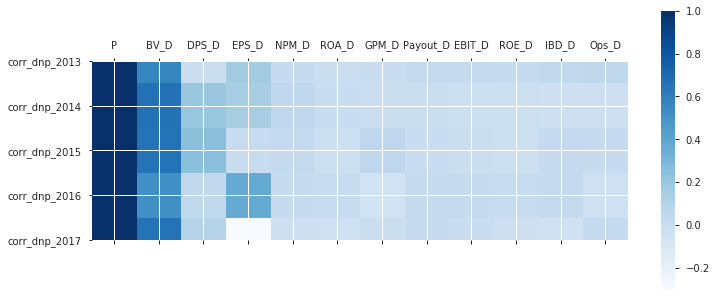

In [60]:
plt.figure(figsize=(12,5))
plt.matshow(corr_dnp_mat_sort.T,fignum=1,cmap='Blues')
plt.xticks(np.arange(12), corr_dnp_mat_sort.T.columns,rotation=0)
plt.yticks(np.arange(5), corr_dnp_mat_sort.T.index,rotation=0)
plt.colorbar()

# Industry group

In [61]:
df.head()

,NAME,P_201101,P_201201,P_201301,P_201401,P_201501,P_201601,P_201701,P_201801,EPS_2012,...,CAGR_NPM,CAGR_IRD,CAGR_ROE,CAGR_ROA,CAGR_DPS,CAGR_BV,CAGR_Payout,sector,sector_code,business_group
0,FANCY,2.04,1.87,1.75,1.68,2.0,2.7,2.78,1.7,-0.15,...,6.267906,NaN,-5.872124,-1.052619,NaN,-5.405945,NaN,สินค้าอุปโภคบริโภค,1.0,ของใช้ในครัวเรือนและสำนักงาน
1,KYE,215.00,179.00,263.00,240.00,260.0,273.0,393.00,470.0,38.90,...,-1.434567,NaN,-11.896327,-9.105290,1.508768,8.092591,5.101882,สินค้าอุปโภคบริโภค,1.0,ของใช้ในครัวเรือนและสำนักงาน
2,MODERN,50.00,5.70,7.70,8.40,9.9,7.9,5.90,5.5,0.57,...,-11.877138,20.262051,-12.538095,-14.011722,-12.944944,-0.627984,-0.347231,สินค้าอุปโภคบริโภค,1.0,ของใช้ในครัวเรือนและสำนักงาน
3,SABINA,113.00,111.00,24.40,22.60,23.7,23.0,23.60,23.7,0.32,...,10.530804,-33.946925,9.544604,15.715264,48.123240,6.217560,26.658281,สินค้าอุปโภคบริโภค,1.0,แฟชั่น
4,SIAM,2.88,3.18,3.12,2.20,2.3,3.0,2.84,2.3,0.02,...,-262.712989,NaN,-242.192095,-238.517403,NaN,-2.514268,NaN,สินค้าอุปโภคบริโภค,1.0,ของใช้ในครัวเรือนและสำนักงาน


In [370]:
df_set = df[df['sector_code']!=13]

In [63]:
df_mai = df[df['sector_code']==13]

In [64]:
df_fin = df[df['sector_code']==3]

In [65]:
df_tech = df[df['sector_code']==12]

In [66]:
df_service_other = df[df['sector_code']==10]

In [174]:
df_service_commerce = df[df['sector_code']==5]

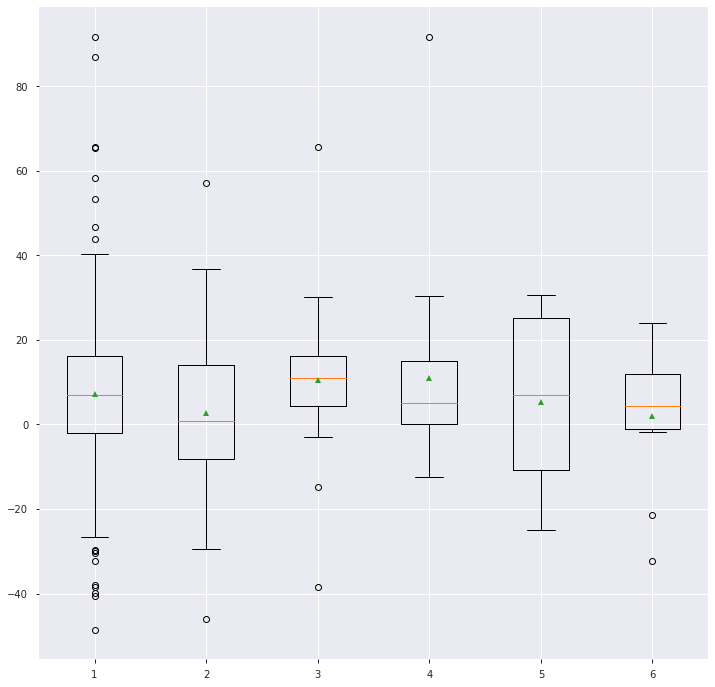

In [68]:
fig = plt.figure(1, figsize=(12, 12))
ax = fig.add_subplot()
bp = ax.boxplot([
        df_set['CAGR_P'], 
        df_mai['CAGR_P'], 
        df_fin['CAGR_P'], 
        df_tech['CAGR_P'], 
        df_service_other['CAGR_P'], 
        df_service_commerce['CAGR_P']
    ], 
    showmeans=True)


In [69]:
df_sector = pd.read_csv('./export_value_by_sactor.csv')

In [70]:
df_sector

,sector_name,sector_code,2012,2013,2014,2015,2016,2017,2018,2019,Grand Total
0,Business,10.0,4.112330e+03,4.872300e+03,4101.58000,4612.0100,4912.7000,3.323890e+03,NaN,NaN,2.593481e+04
1,Charges for the use of intellectual property n...,10.0,3.714550e+03,4.655390e+03,4027.54000,4206.1600,4048.6100,4.382220e+03,5435.609787,NaN,3.047008e+04
2,Commercial services,1.0,1.896750e+05,2.109916e+05,200232.82370,207206.0503,221391.0599,2.432261e+05,277596.452400,38570.297330,1.588889e+06
3,Commercial services (Services excl. government...,1.0,1.021608e+05,1.135886e+05,NaN,NaN,NaN,NaN,NaN,NaN,2.157494e+05
4,Communications services,12.0,9.159850e+02,1.014124e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.930109e+03
5,Computer and information services,12.0,7.238700e+01,1.043130e+02,NaN,NaN,NaN,NaN,NaN,NaN,1.767000e+02
6,Computer services,12.0,9.278200e+01,1.417180e+02,NaN,NaN,NaN,NaN,NaN,NaN,2.345000e+02
7,Construction,4.0,1.329058e+03,3.051577e+03,1375.42000,1383.0200,980.3600,6.370800e+02,552.110804,NaN,9.308626e+03
8,Construction abroad,4.0,4.405000e+02,8.171800e+02,612.83000,533.0300,462.7000,3.580900e+02,NaN,NaN,3.224330e+03
9,Construction in the reporting economy,4.0,2.240700e+02,7.092300e+02,762.59000,849.9900,517.6600,2.789900e+02,NaN,NaN,3.342530e+03


In [186]:
df_sector[df_sector['sector_code']==5]

,sector_name,sector_code,2012,2013,2014,2015,2016,2017,2018,2019,Grand Total
32,"Technical, trade-related, and other business s...",5.0,17731.03,18523.66,20007.44,19872.0,22965.72,20694.51,25165.53776,NaN,144959.8978


In [71]:
df_fin_value = df_sector[df_sector['sector_code']==3][['2012', '2013', '2014', '2015', '2016', '2017']]

In [175]:
df_service_commerce = df_sector[df_sector['sector_code']==5][['2012', '2013', '2014', '2015', '2016', '2017']]

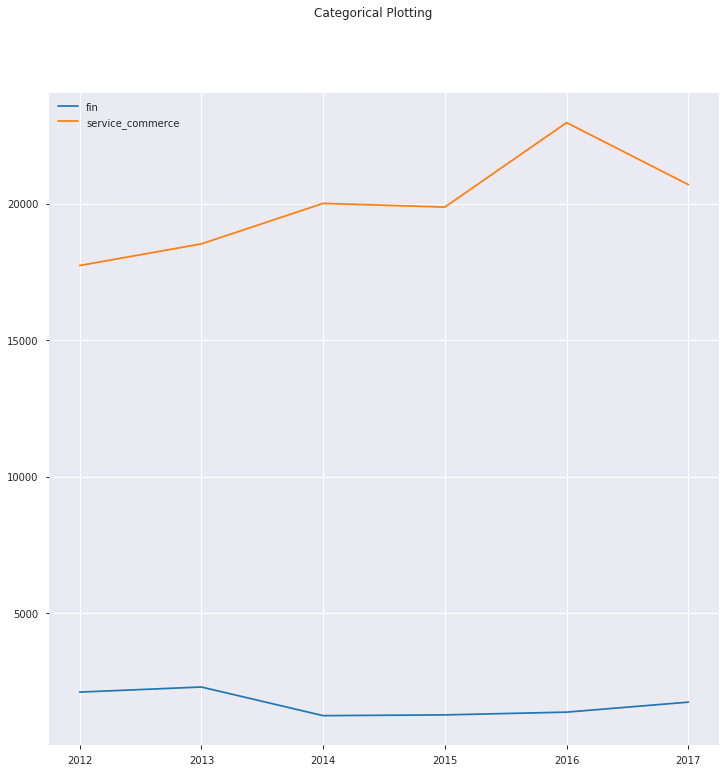

In [176]:
plt.figure(figsize=(12, 12))
plt.subplot()
plt.plot(['2012', '2013', '2014', '2015', '2016', '2017'], df_fin_value.values[0].tolist(), label='fin')
plt.plot(['2012', '2013', '2014', '2015', '2016', '2017'], df_service_commerce.values[0].tolist(), label='service_commerce')
plt.suptitle('Categorical Plotting')
plt.legend()
plt.show()

In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [153]:
df_fin_value.T

,11
2012,2105.484
2013,2292.054
2014,1243.120
2015,1270.520
2016,1371.800
2017,1737.780


In [197]:
norm_df_fin = scaler.fit_transform(df_fin_value.T[[11]]).T

In [198]:
norm_df_service_commerce = scaler.fit_transform(df_service_commerce.T[[32]]).T

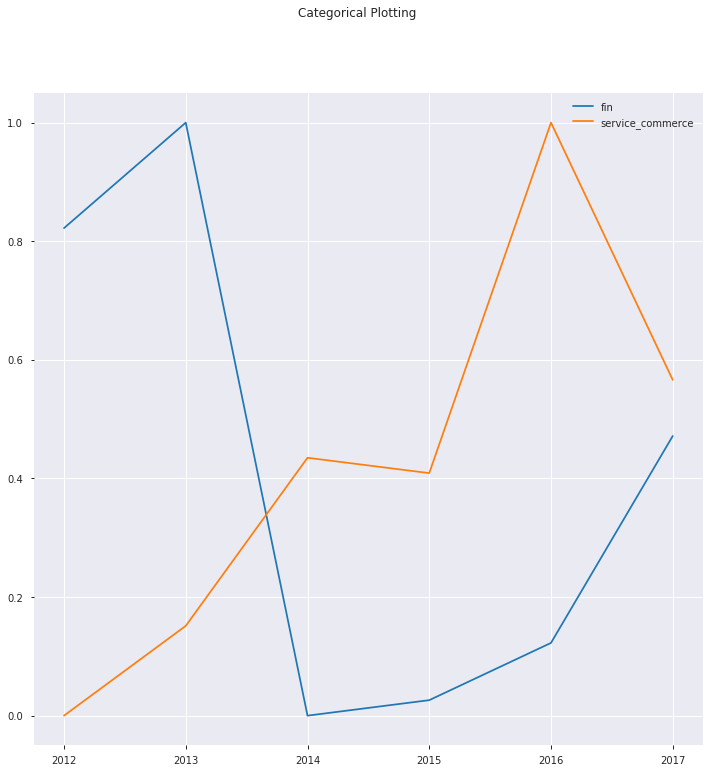

In [199]:
plt.figure(figsize=(12, 12))
plt.subplot()
plt.plot(['2012', '2013', '2014', '2015', '2016', '2017'], norm_df_fin.tolist()[0], label='fin')
plt.plot(['2012', '2013', '2014', '2015', '2016', '2017'], norm_df_service_commerce.tolist()[0], label='service_commerce')
plt.suptitle('Categorical Plotting')
plt.legend()
plt.show()

# Fin sector

In [327]:
# normalize
fin_companies = df[df['sector_code']==3][
    ['NAME', 'P_201201', 'P_201301', 'P_201401', 'P_201501', 'P_201601', 'P_201701']
]
tmp_df = fin_companies.copy().T
tmp_df.columns = a.iloc[0]
tmp_df = tmp_df.iloc[1:]
raster_arr_df = scaler.fit_transform(tmp_df)
norm_fin_companies = pd.DataFrame(data=raster_arr_df, index=tmp_df.index, columns=tmp_df.columns).T
norm_fin_companies

,P_201201,P_201301,P_201401,P_201501,P_201601,P_201701
NAME,,,,,,
AEONTS,0.000000,0.822430,0.775701,1.000000,0.859813,0.950156
ASK,0.000000,0.723577,0.414634,0.634146,0.707317,1.000000
ASP,0.000000,0.252336,0.542056,1.000000,0.663551,0.766355
BAY,0.000000,0.547619,0.392857,1.000000,0.369048,0.880952
BBL,0.032609,1.000000,0.347826,0.869565,0.000000,0.282609
CIMBT,1.000000,0.796791,0.422460,0.449198,0.000000,0.139037
CNS,0.891413,1.000000,0.000000,0.026395,0.027731,0.031073
ECL,0.000000,0.200935,0.158879,1.000000,0.500000,0.425234
FSS,0.000000,0.209524,1.000000,0.476190,0.342857,0.342857


In [338]:
norm_fin_companies.values[0].tolist()

[0.0,
 0.8224299065420562,
 0.7757009345794392,
 1.0,
 0.8598130841121496,
 0.9501557632398754]

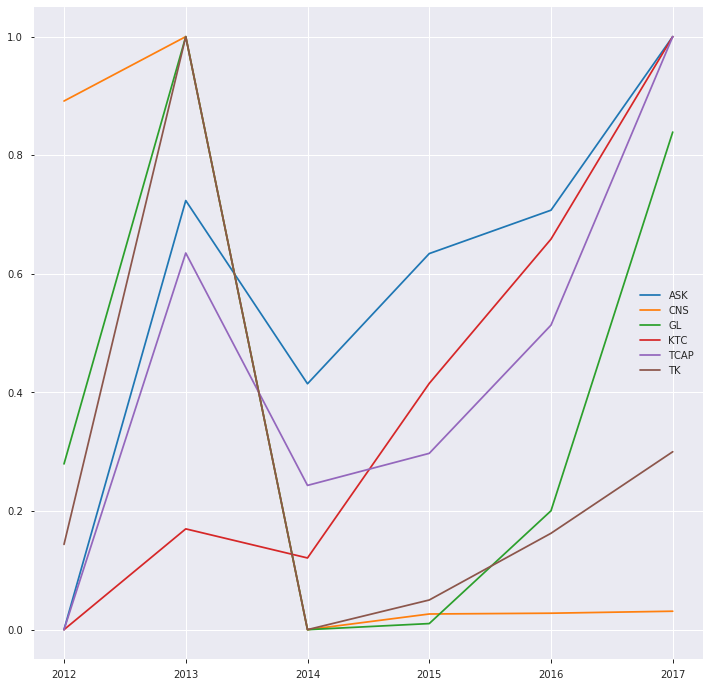

In [342]:
plt.figure(figsize=(12, 12))
plt.subplot()
for i in range(norm_fin_companies.shape[0]):
    company = norm_fin_companies.values[i].tolist()
    if company[5] > company[4] and company[4] > company[3]:
        plt.plot(['2012', '2013', '2014', '2015', '2016', '2017'], company, label=norm_fin_companies.index[i])
plt.legend()
plt.show()

In [251]:
fin_companies

,NAME,P_201201,P_201301,P_201401,P_201501,P_201601,P_201701
13,AEONTS,27.75,93.75,90.00,108.00,96.75,104.00
14,ASK,10.90,19.80,16.00,18.70,19.60,23.20
15,ASP,2.02,2.56,3.18,4.16,3.44,3.66
16,BAY,21.50,33.00,29.75,42.50,29.25,40.00
17,BBL,151.50,196.00,166.00,190.00,150.00,163.00
18,CIMBT,2.92,2.54,1.84,1.89,1.05,1.31
19,CNS,28.25,31.50,1.57,2.36,2.40,2.50
20,ECL,0.70,1.13,1.04,2.84,1.77,1.61
21,FSS,2.20,2.64,4.30,3.20,2.92,2.92
22,GBX,0.70,0.74,1.12,0.95,0.73,0.80


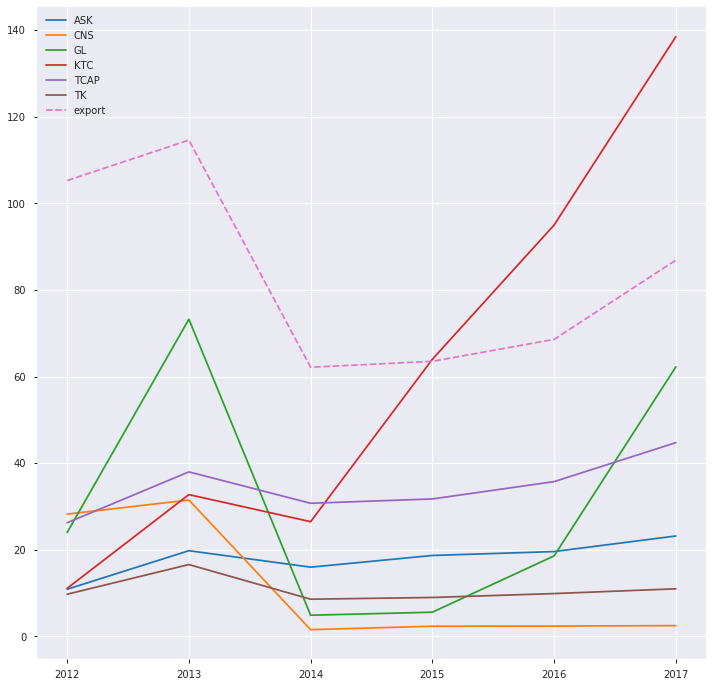

In [741]:
plt.figure(figsize=(12, 12))
plt.subplot()
for i in range(fin_companies.shape[0]):
    company = fin_companies.values[i].tolist()
    if company[5] > company[4] and company[4] > company[3]:
        plt.plot(['2012', '2013', '2014', '2015', '2016', '2017'], company[1:], label=company[0])
        

fin_sector = df_sector[df_sector['sector_code']==3][['2012', '2013', '2014', '2015', '2016', '2017']].values[0]
plt.plot(['2012', '2013', '2014', '2015', '2016', '2017'], fin_sector/20, label='export', linestyle='--')

plt.legend()
plt.show()

In [76]:
fin_companies

,NAME,P_201201,P_201301,P_201401,P_201501,P_201601,P_201701
13,AEONTS,27.75,93.75,90.00,108.00,96.75,104.00
14,ASK,10.90,19.80,16.00,18.70,19.60,23.20
15,ASP,2.02,2.56,3.18,4.16,3.44,3.66
16,BAY,21.50,33.00,29.75,42.50,29.25,40.00
17,BBL,151.50,196.00,166.00,190.00,150.00,163.00
18,CIMBT,2.92,2.54,1.84,1.89,1.05,1.31
19,CNS,28.25,31.50,1.57,2.36,2.40,2.50
20,ECL,0.70,1.13,1.04,2.84,1.77,1.61
21,FSS,2.20,2.64,4.30,3.20,2.92,2.92
22,GBX,0.70,0.74,1.12,0.95,0.73,0.80


# service_commerce sector

In [77]:
service_commerce_companies = df[df['sector_code']==5][['NAME', 'P_201201', 'P_201301', 'P_201401', 'P_201501', 'P_201601', 'P_201701']]

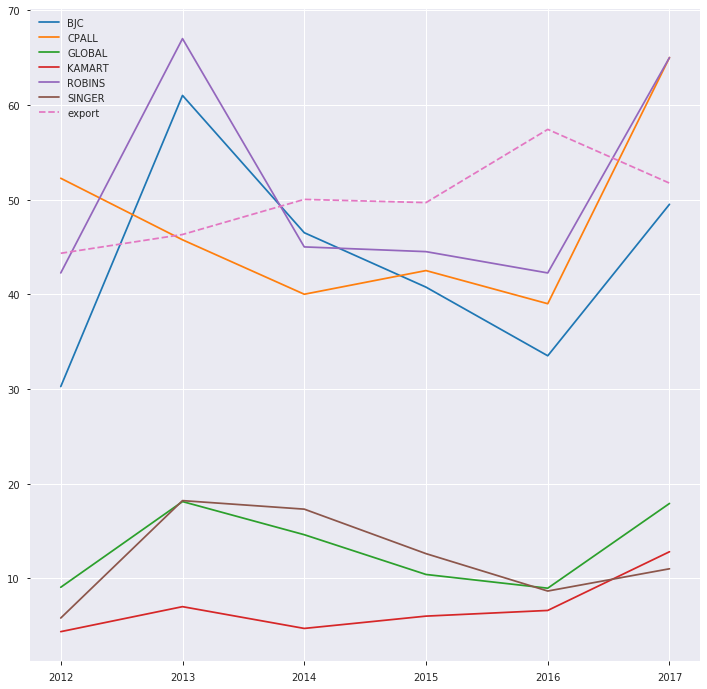

In [747]:
plt.figure(figsize=(12, 12))
plt.subplot()
for i in range(service_commerce_companies.shape[0]):
    company = service_commerce_companies.values[i].tolist()
    if company[0] != 'MAKRO' and company[6] > company[5] and company[6] > company[1]:
        plt.plot(['2012', '2013', '2014', '2015', '2016', '2017'], company[1:], label=company[0])

service_commerce_sector = df_sector[df_sector['sector_code']==5][['2012', '2013', '2014', '2015', '2016', '2017']].values[0]
plt.plot(['2012', '2013', '2014', '2015', '2016', '2017'], service_commerce_sector/200, label='export', linestyle='--')

plt.legend()
plt.show()

In [351]:
service_commerce_companies

,NAME,P_201201,P_201301,P_201401,P_201501,P_201601,P_201701
104,BJC,30.25,61.00,46.50,40.75,33.50,49.50
105,CPALL,52.25,45.75,40.00,42.50,39.00,65.00
106,GLOBAL,9.05,18.10,14.60,10.40,8.95,17.90
107,HMPRO,11.10,12.80,8.55,8.05,6.90,10.10
108,IT,10.30,4.98,2.62,2.72,2.28,3.08
109,KAMART,4.36,7.00,4.70,6.00,6.60,12.80
110,LOXLEY,3.20,5.20,3.30,4.20,2.34,3.16
111,MAKRO,246.00,446.00,28.75,36.50,35.50,35.00
112,MIDA,0.70,1.44,1.35,1.40,0.90,0.81
113,ROBINS,42.25,67.00,45.00,44.50,42.25,65.00


In [80]:
tech_companies = df[df['sector_code']==12][['NAME', 'P_201201', 'P_201301', 'P_201401', 'P_201501', 'P_201601', 'P_201701']]

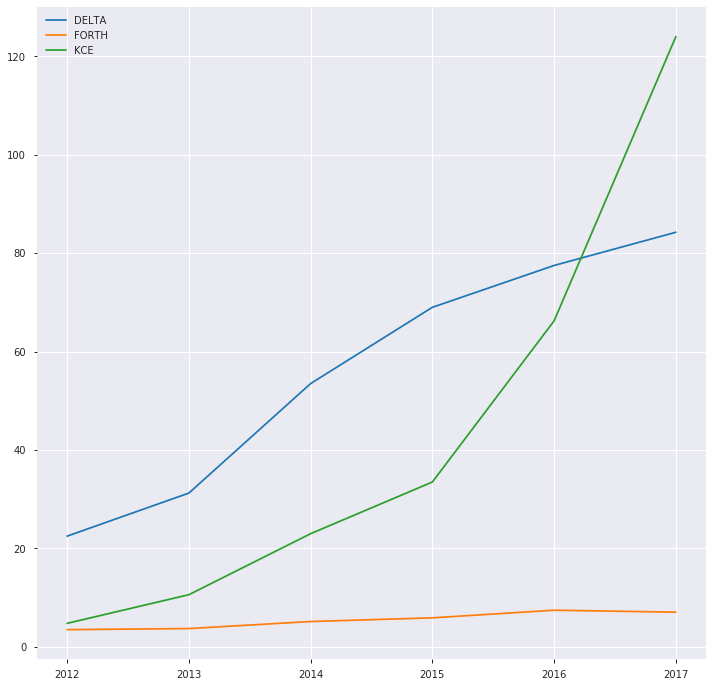

In [364]:
plt.figure(figsize=(12, 12))
plt.subplot()
for i in range(tech_companies.shape[0]):
    company = tech_companies.values[i].tolist()
    if company[5] > company[4] and company[4] > company[3] and company[6] > company[1]:
        plt.plot(['2012', '2013', '2014', '2015', '2016', '2017'], company[1:], label=company[0])
plt.legend()
plt.show()

In [82]:
tech_companies

,NAME,P_201201,P_201301,P_201401,P_201501,P_201601,P_201701
147,ADVANC,146.50,209.00,187.00,249.00,143.00,149.50
148,AIT,48.00,58.75,23.00,37.50,26.75,24.60
149,CCET,2.58,3.22,2.80,2.78,3.28,2.80
150,DELTA,22.50,31.25,53.50,69.00,77.50,84.25
151,DTAC,67.50,87.50,93.00,95.50,28.25,40.75
152,FORTH,3.50,3.72,5.15,5.90,7.45,7.05
153,HANA,19.40,22.80,25.25,37.75,34.50,39.50
154,INTUCH,42.75,69.50,64.00,78.00,49.50,50.75
155,JAS,2.08,5.50,6.20,7.35,3.06,7.85
156,JMART,6.00,14.00,19.10,10.20,7.25,14.30


# Fin comp

In [583]:
fin_companies[['P_201701']]

,P_201701
13,104.00
14,23.20
15,3.66
16,40.00
17,163.00
18,1.31
19,2.50
20,1.61
21,2.92
22,0.80


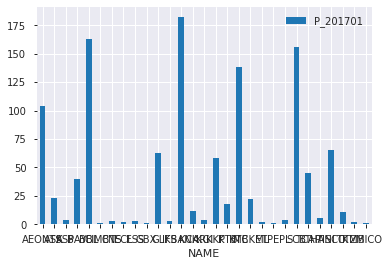

In [587]:
fin_companies.plot.bar(x='NAME', y='P_201701', rot=0)

In [ ]:
company

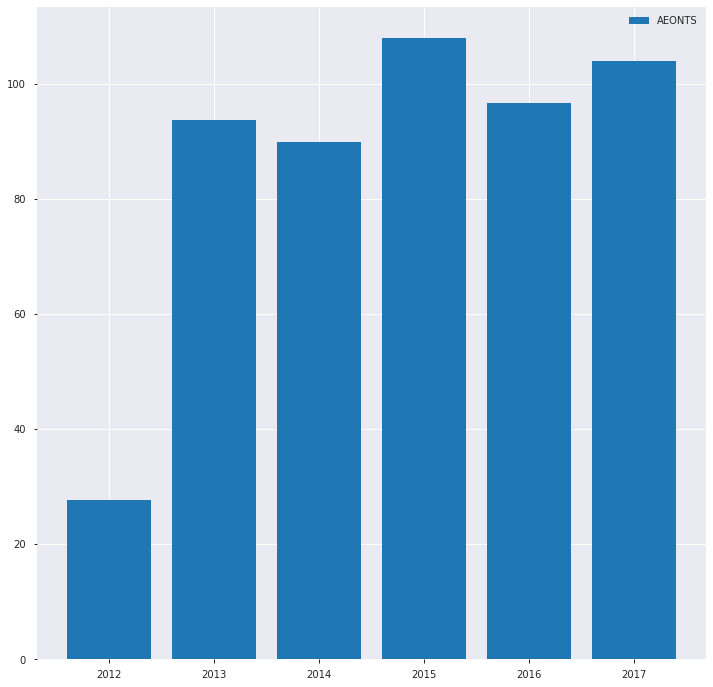

In [593]:
plt.figure(figsize=(12, 12))
company = fin_companies.values[0].tolist()
plt.bar(['2012', '2013', '2014', '2015', '2016', '2017'], company[1:], label=company[0])
plt.legend()
plt.show()

# KTC

In [450]:
code = 'KTC'
ktc = pd.DataFrame({
    'NAME': ['P', 'BV', 'EPS', 'DPS'],
    '2012': df[df['NAME']==code][['P_201201', 'BV_2012', 'EPS_2012', 'DPS_2012']].values[0],
    '2013': df[df['NAME']==code][['P_201301', 'BV_2013', 'EPS_2013', 'DPS_2013']].values[0],
    '2014': df[df['NAME']==code][['P_201401', 'BV_2014', 'EPS_2014', 'DPS_2014']].values[0],
    '2015': df[df['NAME']==code][['P_201501', 'BV_2015', 'EPS_2015', 'DPS_2015']].values[0],
    '2016': df[df['NAME']==code][['P_201601', 'BV_2016', 'EPS_2016', 'DPS_2016']].values[0],
    '2017': df[df['NAME']==code][['P_201701', 'BV_2017', 'EPS_2017', 'DPS_2017']].values[0],
    '2018': [df[df['NAME']==code][['P_201801']].values[0][0], np.nan, np.nan, np.nan]
})
ktc

,NAME,2012,2013,2014,2015,2016,2017,2018
0,P,11.10,32.75,26.50,64.00,95.00,138.50,184.5
1,BV,20.13,23.77,28.58,33.87,40.03,48.78,NaN
2,EPS,0.99,4.97,6.81,8.04,9.68,12.82,NaN
3,DPS,0.40,2.00,2.75,3.25,4.00,5.30,NaN


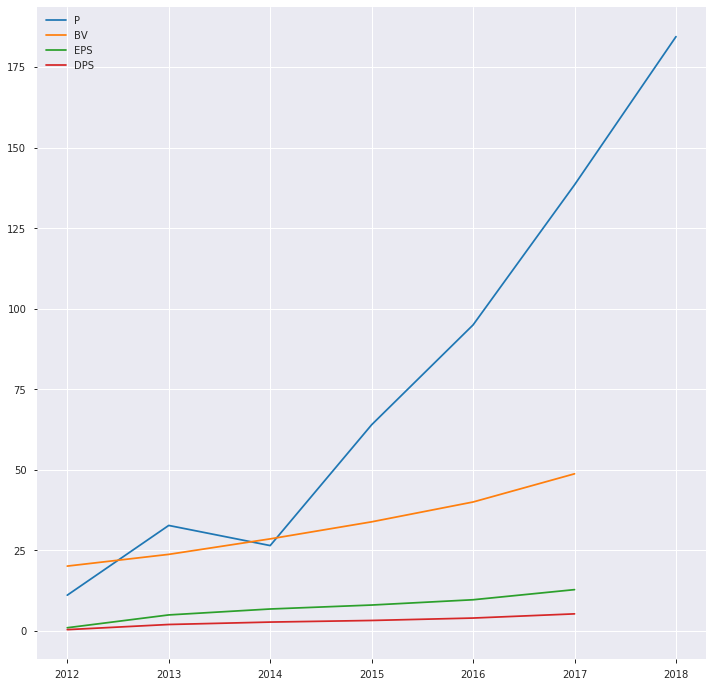

In [451]:
plt.figure(figsize=(12, 12))
plt.subplot()
for i in range(ktc.shape[0]):
    ratio = ktc.values[i].tolist()
    plt.plot(['2012', '2013', '2014', '2015', '2016', '2017', '2018'], ratio[1:], label=ratio[0])
plt.legend()
plt.show()

# GL

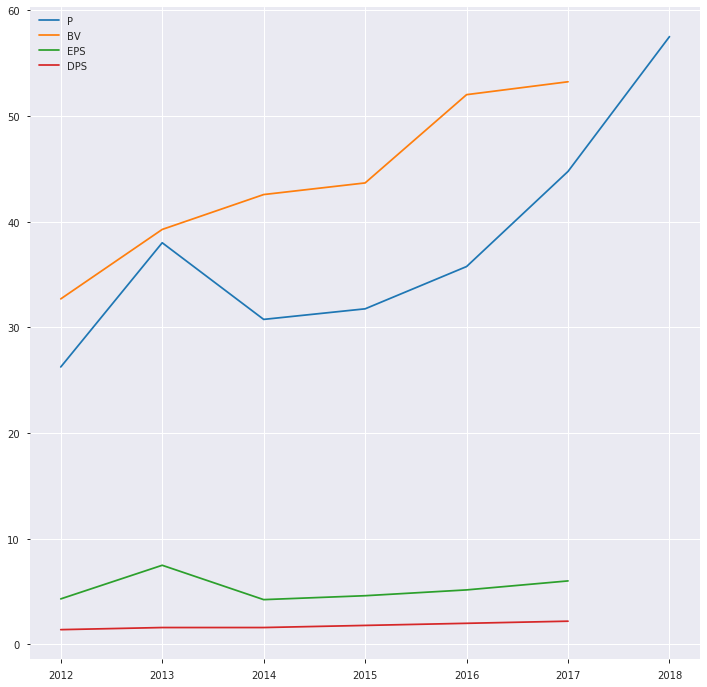

In [456]:
code = 'TCAP'
stock = pd.DataFrame({
    'NAME': ['P', 'BV', 'EPS', 'DPS'],
    '2012': df[df['NAME']==code][['P_201201', 'BV_2012', 'EPS_2012', 'DPS_2012']].values[0],
    '2013': df[df['NAME']==code][['P_201301', 'BV_2013', 'EPS_2013', 'DPS_2013']].values[0],
    '2014': df[df['NAME']==code][['P_201401', 'BV_2014', 'EPS_2014', 'DPS_2014']].values[0],
    '2015': df[df['NAME']==code][['P_201501', 'BV_2015', 'EPS_2015', 'DPS_2015']].values[0],
    '2016': df[df['NAME']==code][['P_201601', 'BV_2016', 'EPS_2016', 'DPS_2016']].values[0],
    '2017': df[df['NAME']==code][['P_201701', 'BV_2017', 'EPS_2017', 'DPS_2017']].values[0],
    '2018': [df[df['NAME']==code][['P_201801']].values[0][0], np.nan, np.nan, np.nan]
})
plt.figure(figsize=(12, 12))
plt.subplot()
for i in range(stock.shape[0]):
    ratio = stock.values[i].tolist()
    plt.plot(['2012', '2013', '2014', '2015', '2016', '2017', '2018'], ratio[1:], label=ratio[0])
plt.legend()
plt.show()

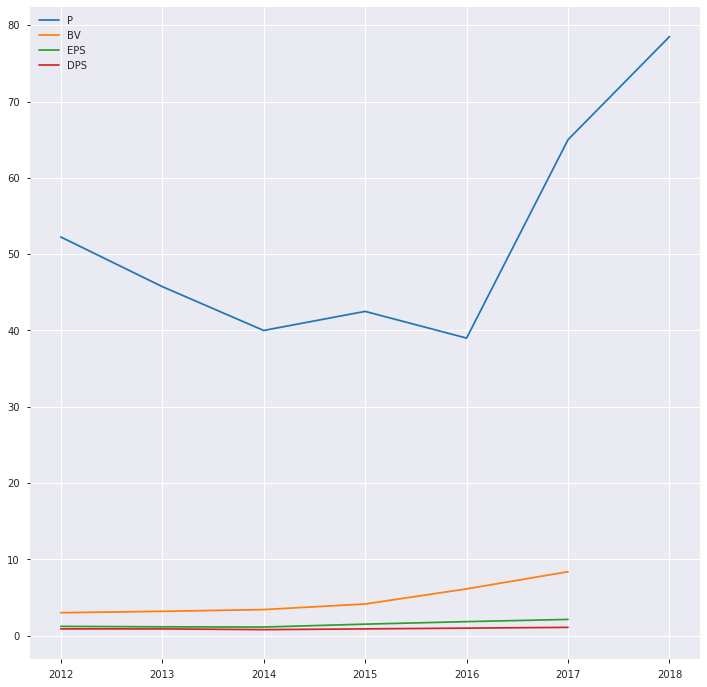

In [460]:
code = 'CPALL'
stock = pd.DataFrame({
    'NAME': ['P', 'BV', 'EPS', 'DPS'],
    '2012': df[df['NAME']==code][['P_201201', 'BV_2012', 'EPS_2012', 'DPS_2012']].values[0],
    '2013': df[df['NAME']==code][['P_201301', 'BV_2013', 'EPS_2013', 'DPS_2013']].values[0],
    '2014': df[df['NAME']==code][['P_201401', 'BV_2014', 'EPS_2014', 'DPS_2014']].values[0],
    '2015': df[df['NAME']==code][['P_201501', 'BV_2015', 'EPS_2015', 'DPS_2015']].values[0],
    '2016': df[df['NAME']==code][['P_201601', 'BV_2016', 'EPS_2016', 'DPS_2016']].values[0],
    '2017': df[df['NAME']==code][['P_201701', 'BV_2017', 'EPS_2017', 'DPS_2017']].values[0],
    '2018': [df[df['NAME']==code][['P_201801']].values[0][0], np.nan, np.nan, np.nan]
})
plt.figure(figsize=(12, 12))
plt.subplot()
for i in range(stock.shape[0]):
    ratio = stock.values[i].tolist()
    plt.plot(['2012', '2013', '2014', '2015', '2016', '2017', '2018'], ratio[1:], label=ratio[0])
plt.legend()
plt.show()

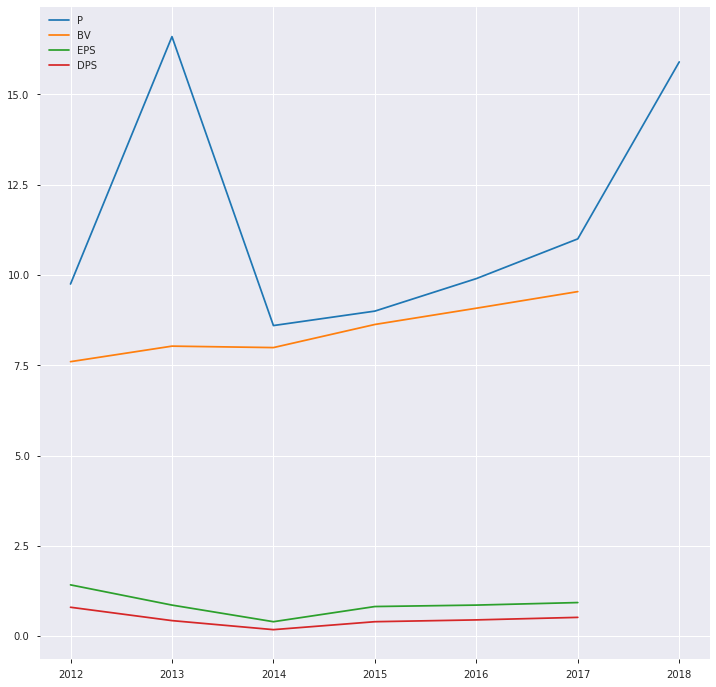

In [604]:
code = 'TK'
stock = pd.DataFrame({
    'NAME': ['P', 'BV', 'EPS', 'DPS'],
    '2012': df[df['NAME']==code][['P_201201', 'BV_2012', 'EPS_2012', 'DPS_2012']].values[0],
    '2013': df[df['NAME']==code][['P_201301', 'BV_2013', 'EPS_2013', 'DPS_2013']].values[0],
    '2014': df[df['NAME']==code][['P_201401', 'BV_2014', 'EPS_2014', 'DPS_2014']].values[0],
    '2015': df[df['NAME']==code][['P_201501', 'BV_2015', 'EPS_2015', 'DPS_2015']].values[0],
    '2016': df[df['NAME']==code][['P_201601', 'BV_2016', 'EPS_2016', 'DPS_2016']].values[0],
    '2017': df[df['NAME']==code][['P_201701', 'BV_2017', 'EPS_2017', 'DPS_2017']].values[0],
    '2018': [df[df['NAME']==code][['P_201801']].values[0][0], np.nan, np.nan, np.nan]
})
plt.figure(figsize=(12, 12))
plt.subplot()
for i in range(stock.shape[0]):
    ratio = stock.values[i].tolist()
    plt.plot(['2012', '2013', '2014', '2015', '2016', '2017', '2018'], ratio[1:], label=ratio[0])
plt.legend()
plt.show()

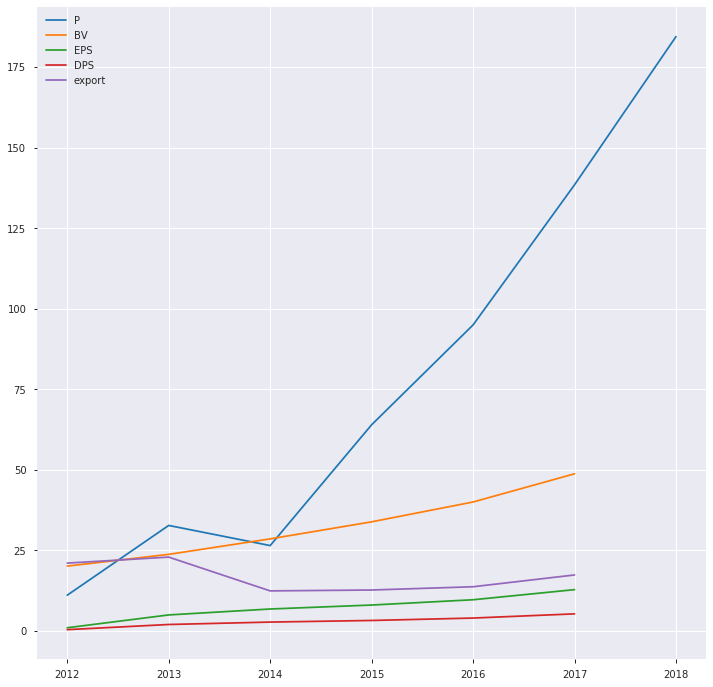

In [735]:
code = 'KTC'
stock = pd.DataFrame({
    'NAME': ['P', 'BV', 'EPS', 'DPS'],
    '2012': df[df['NAME']==code][['P_201201', 'BV_2012', 'EPS_2012', 'DPS_2012']].values[0],
    '2013': df[df['NAME']==code][['P_201301', 'BV_2013', 'EPS_2013', 'DPS_2013']].values[0],
    '2014': df[df['NAME']==code][['P_201401', 'BV_2014', 'EPS_2014', 'DPS_2014']].values[0],
    '2015': df[df['NAME']==code][['P_201501', 'BV_2015', 'EPS_2015', 'DPS_2015']].values[0],
    '2016': df[df['NAME']==code][['P_201601', 'BV_2016', 'EPS_2016', 'DPS_2016']].values[0],
    '2017': df[df['NAME']==code][['P_201701', 'BV_2017', 'EPS_2017', 'DPS_2017']].values[0],
    '2018': [df[df['NAME']==code][['P_201801']].values[0][0], np.nan, np.nan, np.nan]
})
plt.figure(figsize=(12, 12))
plt.subplot()
for i in range(stock.shape[0]):
    ratio = stock.values[i].tolist()
    plt.plot(['2012', '2013', '2014', '2015', '2016', '2017', '2018'], ratio[1:], label=ratio[0])
    

fin_sector = df_sector[df_sector['sector_code']==3][['2012', '2013', '2014', '2015', '2016', '2017']].values[0]
plt.plot(['2012', '2013', '2014', '2015', '2016', '2017'], fin_sector/100, label='export')

plt.legend()
plt.show()